In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 

In [2]:
#load data on dataframe
cancer_df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
#display dataframe
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
#count of rows and columns
cancer_df.shape

(858, 36)

In [4]:
# Get data frame info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
# Get the statistics of the data frame
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Replace '?' with NaN
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
cancer_df.isnull()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


<AxesSubplot: >

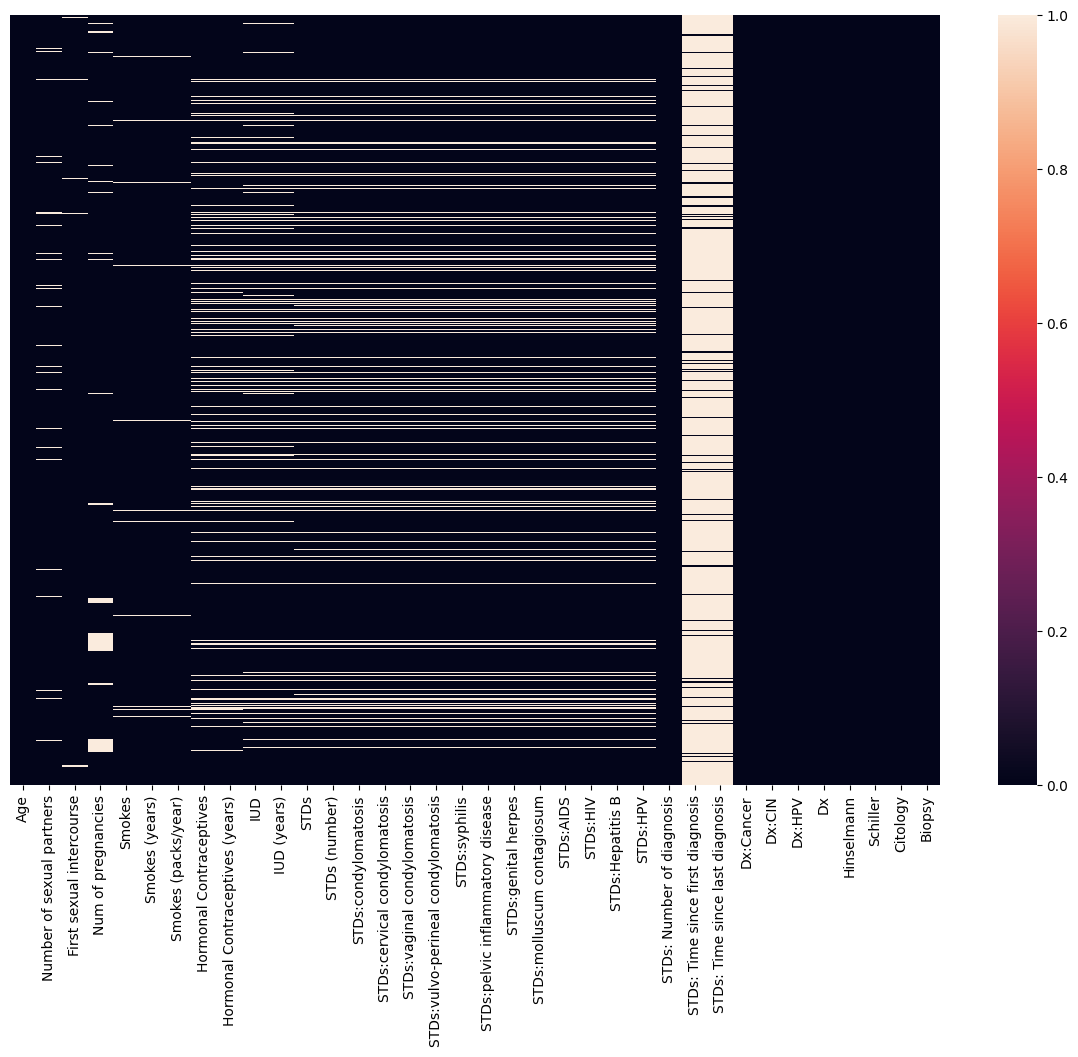

In [8]:
# Plot hearmap
plt.figure(figsize =(15, 10))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

PERFORM EXPLORATORY DATA ANALYSIS

In [9]:
# Get data frame info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [10]:
# Since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
# we can drop them
cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [12]:
# Get the statistics of the dataframe
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Get the average for all the columns 
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [14]:
# Replace null values with mean
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

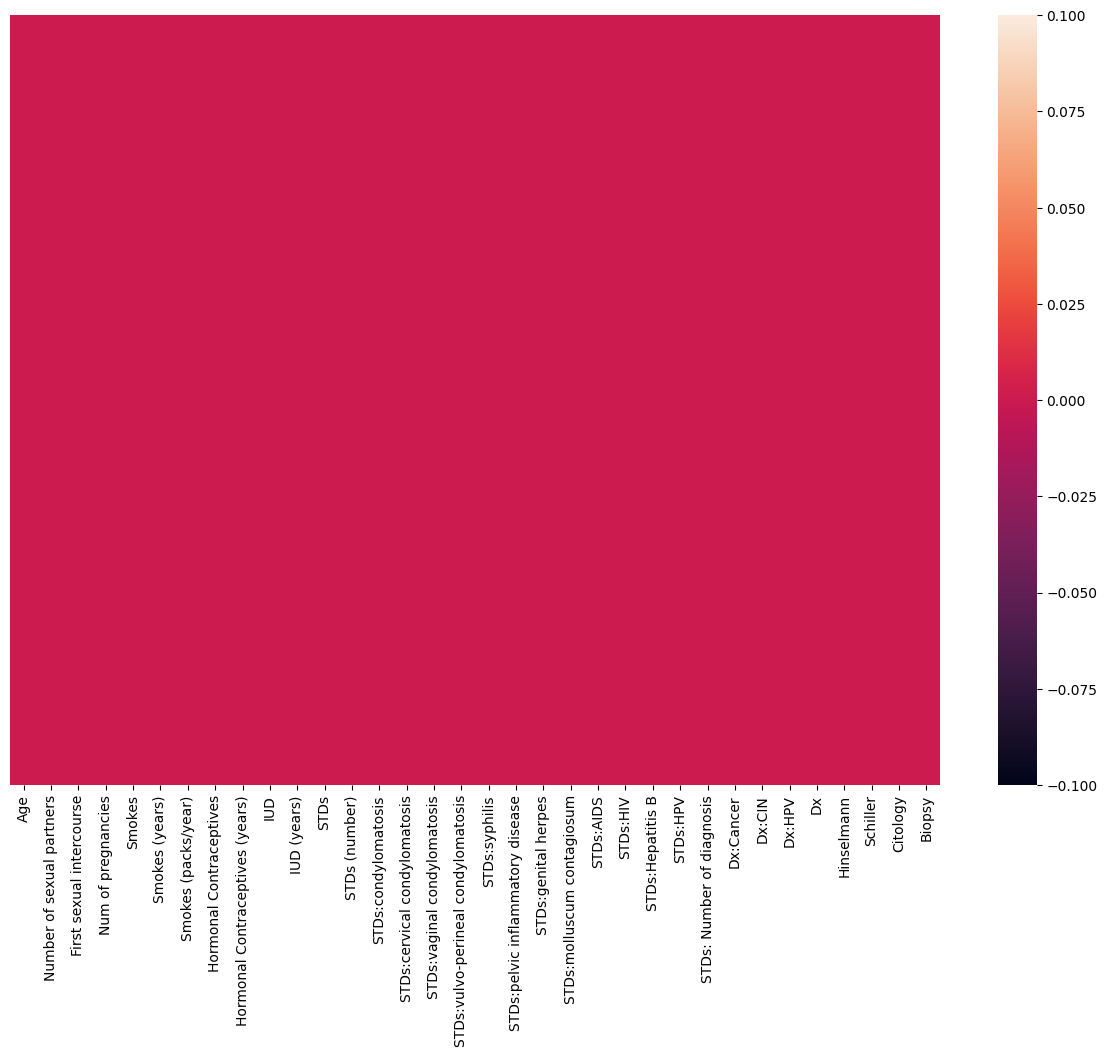

In [15]:
# Nan heatmap
plt.figure(figsize =(15, 10))
sns.heatmap(cancer_df.isnull(),yticklabels=False)

In [16]:
# Get the correlation matrix
corr_matrix = cancer_df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


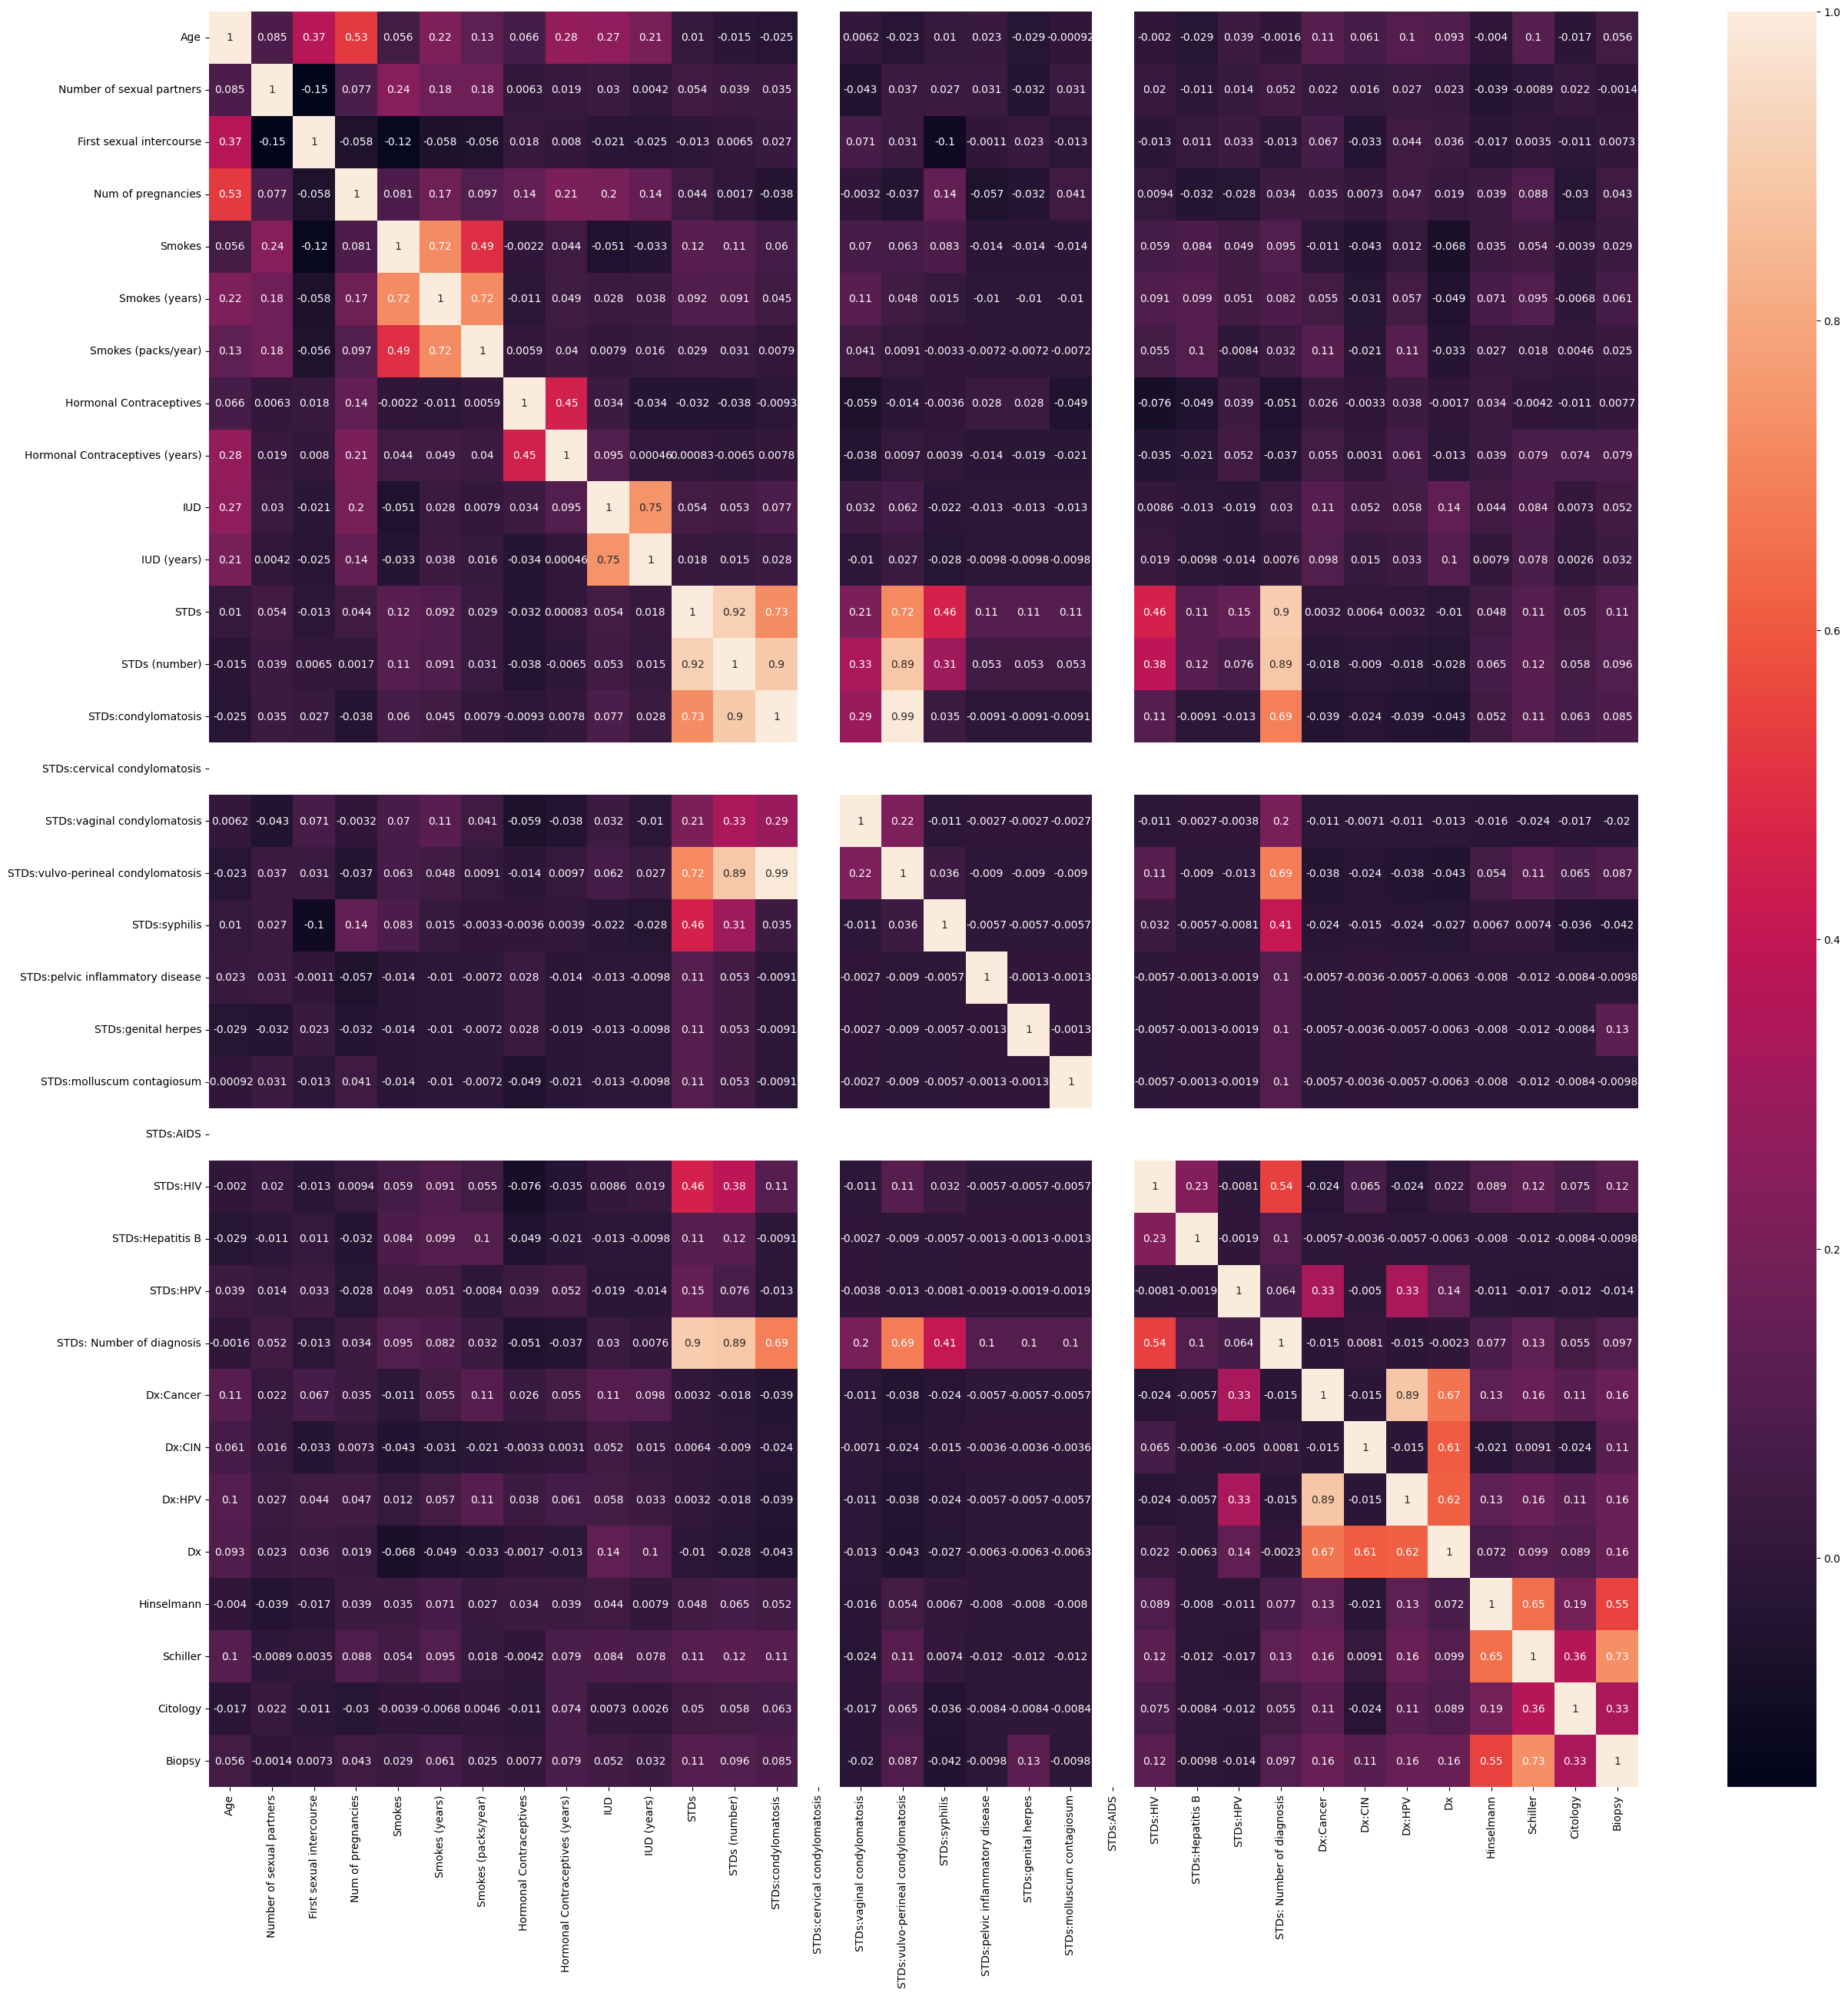

In [17]:
# Plot the correlation matrix
plt.figure(figsize =(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

C:\Users\TM-Asus\AppData\Local\Temp\ipykernel_160\1459292932.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\TM-Asus\AppData\Local\Temp\ipykernel_160\1459292932.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of Schiller by positivity')

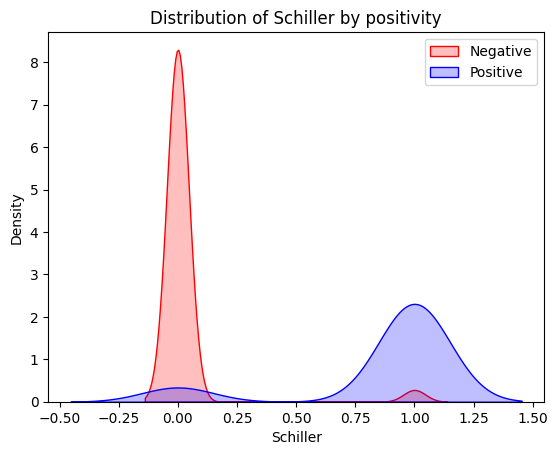

In [18]:
# Positivity by Schiller
ax = sns.kdeplot(cancer_df.Schiller[(cancer_df["Biopsy"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(cancer_df.Schiller[(cancer_df["Biopsy"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Negative", "Positive"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Schiller")
ax.set_title("Distribution of Schiller by positivity")

C:\Users\TM-Asus\AppData\Local\Temp\ipykernel_160\283911926.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\TM-Asus\AppData\Local\Temp\ipykernel_160\283911926.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of Age by positivity')

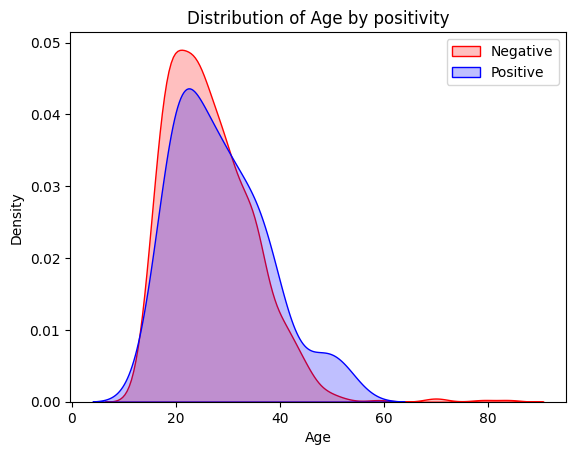

In [19]:
# Positivity by Age
ax = sns.kdeplot(cancer_df.Age[(cancer_df["Biopsy"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(cancer_df.Age[(cancer_df["Biopsy"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Negative", "Positive"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Age")
ax.set_title("Distribution of Age by positivity")

In [20]:
# Check STDs:AIDS values
cancer_df['STDs:AIDS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:AIDS, Length: 858, dtype: float64

In [21]:
# Value count
cancer_df['STDs:AIDS'].value_counts()

0.0    858
Name: STDs:AIDS, dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Number of sexual partners'}>,
        <AxesSubplot: title={'center': 'First sexual intercourse'}>,
        <AxesSubplot: title={'center': 'Num of pregnancies'}>,
        <AxesSubplot: title={'center': 'Smokes'}>,
        <AxesSubplot: title={'center': 'Smokes (years)'}>],
       [<AxesSubplot: title={'center': 'Smokes (packs/year)'}>,
        <AxesSubplot: title={'center': 'Hormonal Contraceptives'}>,
        <AxesSubplot: title={'center': 'Hormonal Contraceptives (years)'}>,
        <AxesSubplot: title={'center': 'IUD'}>,
        <AxesSubplot: title={'center': 'IUD (years)'}>,
        <AxesSubplot: title={'center': 'STDs'}>],
       [<AxesSubplot: title={'center': 'STDs (number)'}>,
        <AxesSubplot: title={'center': 'STDs:condylomatosis'}>,
        <AxesSubplot: title={'center': 'STDs:cervical condylomatosis'}>,
        <AxesSubplot: title={'center': 'STDs:vaginal condylomatosis'}>,
        <A

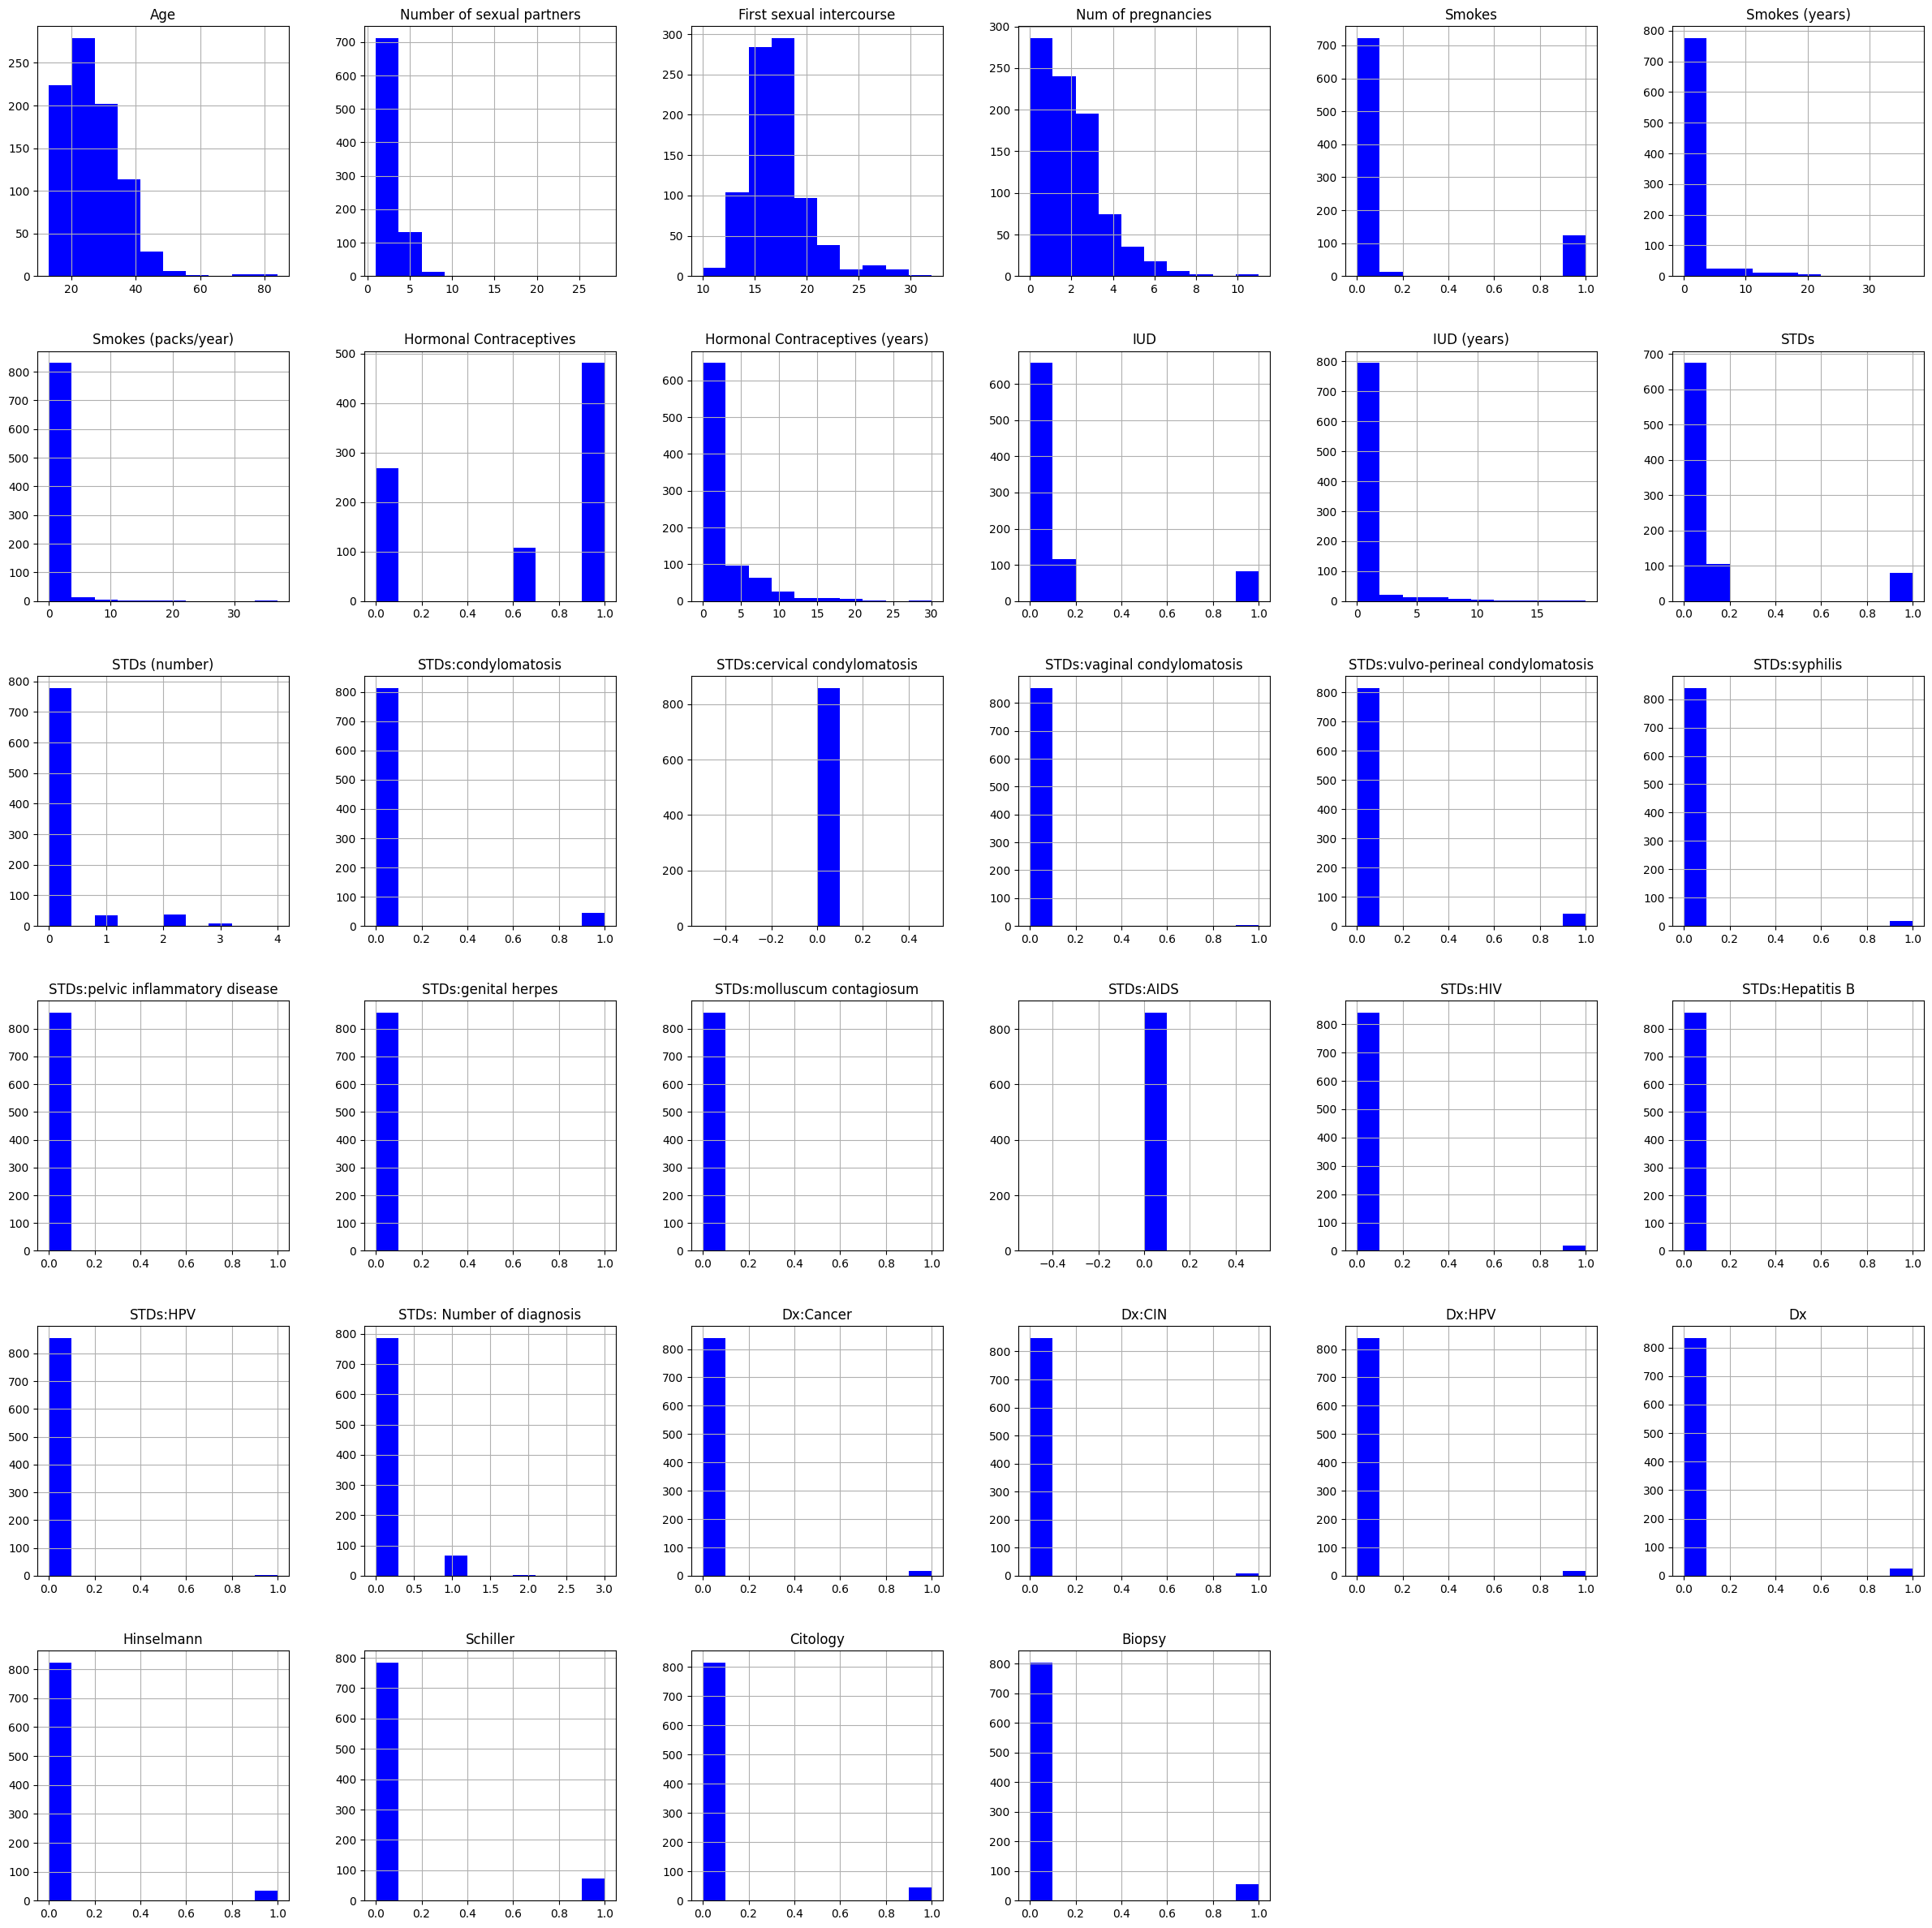

In [22]:
cancer_df.hist(bins = 10, figsize = (30, 30), color= 'b') 

In [23]:
cancer_df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [24]:
# Plot pie Chart to get the information about the percentage of positivity of Biopsy using Plotly histogram

import plotly.graph_objects as go
fig=go.Figure(data=[go.Pie(labels=['Negative (0)', 'Positive (1)'], values=cancer_df['Biopsy'].value_counts())])
fig.show()

In [25]:
# Plot histogram graph for the Schiller variable contribute to biopsy positivity
fig=px.histogram(cancer_df, x='Schiller', color='Biopsy')
fig.show()

IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE TRAINING

In [26]:
# Assigning input_df as input and output_df as output
y = cancer_df['Biopsy']
X = cancer_df.drop(columns = ['Biopsy'])

In [27]:
y.shape

(858,)

In [28]:
X.shape

(858, 33)

In [29]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [30]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_test.shape)
print(X_train.shape)

(258, 33)
(600, 33)


In [31]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
649,32,2.0,17.0,2.0,1.0,9.0,0.9,1.0,10.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
361,20,4.0,17.0,1.0,0.0,0.0,0.0,1.0,0.160000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
44,37,3.0,19.0,3.0,1.0,12.0,6.0,1.0,13.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
331,27,1.0,15.0,4.0,0.0,0.0,0.0,1.0,2.282201,1.0,...,0.0,0.0,0,0,0,0,0,0,0,0
563,36,1.0,28.0,1.0,1.0,16.0,2.4,0.0,0.000000,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,26,3.0,15.0,5.0,0.0,0.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0,0,0,0,0,0,0,0
560,38,1.0,24.0,3.0,0.0,0.0,0.0,1.0,6.500000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
410,20,2.0,11.0,3.0,0.0,0.0,0.0,1.0,0.420000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [32]:
X_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
713,16,1.000000,16.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
447,17,3.000000,14.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
589,41,3.000000,18.0,4.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
225,28,6.000000,15.0,3.0,0.000000,0.000000,0.000000,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
220,25,2.527644,18.0,2.0,0.000000,0.000000,0.000000,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,39,1.000000,24.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
658,18,2.000000,14.0,2.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
763,41,3.000000,18.0,5.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0,1,0,1,1,0,0,0
781,33,3.000000,18.0,2.0,0.145562,1.219721,0.453144,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,1,1,1


In [33]:
y_train

649    0
361    0
44     1
331    0
563    0
      ..
231    0
560    0
857    0
410    0
146    0
Name: Biopsy, Length: 600, dtype: int64

In [34]:
y_test

713    0
447    0
589    0
225    0
220    0
      ..
38     0
658    0
763    0
781    1
468    0
Name: Biopsy, Length: 258, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

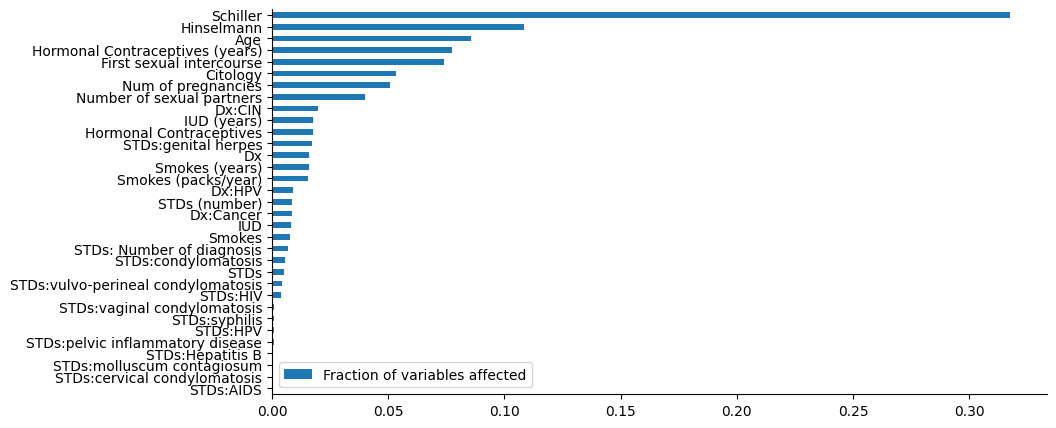

In [36]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [37]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [38]:
cancer_df['Age'] = cancer_df['Age'].astype(float)
cancer_df['STDs: Number of diagnosis'] = cancer_df['STDs: Number of diagnosis'].astype(float)

cancer_df['Dx:Cancer'] = cancer_df['Dx:Cancer'].astype(float)
cancer_df['Dx:CIN'] = cancer_df['Dx:CIN'].astype(float)
cancer_df['Dx:HPV'] = cancer_df['Dx:HPV'].astype(float)
cancer_df['Dx'] = cancer_df['Dx'].astype(float)
cancer_df['Hinselmann'] = cancer_df['Hinselmann'].astype(float)
cancer_df['Schiller'] = cancer_df['Schiller'].astype(float)
cancer_df['Citology'] = cancer_df['Citology'].astype(float)
cancer_df['Biopsy'] = cancer_df['Biopsy'].astype(float)

In [39]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

TRAIN AND EVALUATE USING SUPPORT VECTOR MACHINE CLASSIFIER

In [40]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)

C:\Users\TM-Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\TM-Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\TM-Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\TM-Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\TM-Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [41]:
y_predict=model_svm.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       242
           1       0.53      0.62      0.57        16

    accuracy                           0.94       258
   macro avg       0.75      0.79      0.77       258
weighted avg       0.95      0.94      0.94       258



<AxesSubplot: >

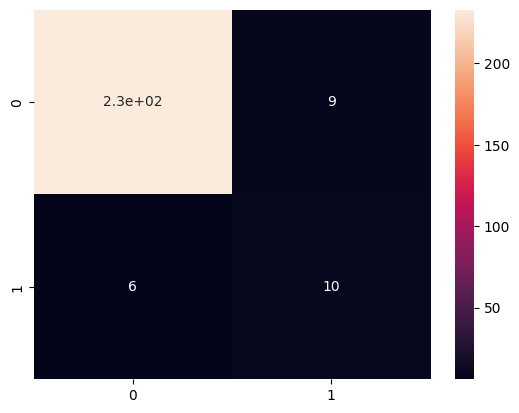

In [43]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True)

TRAIN AND EVALUATE USING RANDOM FOREST CLASSIFIER

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_predict=model_rf.predict(X_test)

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.62      0.62      0.62        16

    accuracy                           0.95       258
   macro avg       0.80      0.80      0.80       258
weighted avg       0.95      0.95      0.95       258



<AxesSubplot: >

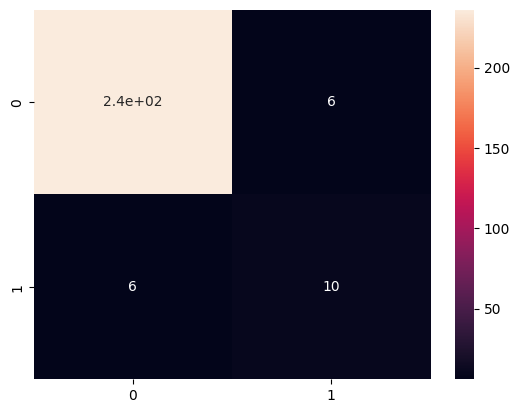

In [47]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

TRAIN AND EVALUATE USING K-NEAREST NEIGHBOR (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_predict=model_knn.predict(X_test)

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       242
           1       0.00      0.00      0.00        16

    accuracy                           0.93       258
   macro avg       0.47      0.50      0.48       258
weighted avg       0.88      0.93      0.91       258



<AxesSubplot: >

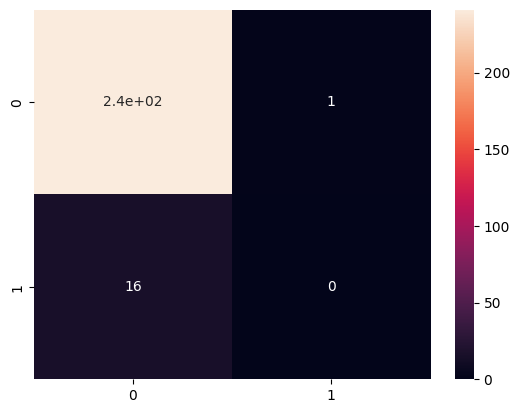

In [51]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

TRAIN AND EVALUATE USING NAIVE BAYES CLASSIFIER

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
model_gnb=GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_predict=model_gnb.predict(X_test)

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       242
           1       0.18      0.94      0.31        16

    accuracy                           0.74       258
   macro avg       0.59      0.83      0.57       258
weighted avg       0.94      0.74      0.80       258



<AxesSubplot: >

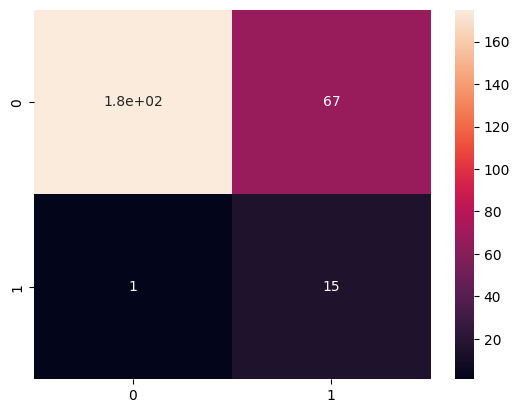

In [56]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

PLOT ROC CURVES FOR THE 4 MODELS

In [57]:
model_svm.predict_proba(X_test)

array([[0.98027155, 0.01972845],
       [0.98288364, 0.01711636],
       [0.98083437, 0.01916563],
       [0.98406621, 0.01593379],
       [0.98082868, 0.01917132],
       [0.98909576, 0.01090424],
       [0.88352265, 0.11647735],
       [0.98129238, 0.01870762],
       [0.98286219, 0.01713781],
       [0.9823206 , 0.0176794 ],
       [0.98348185, 0.01651815],
       [0.98369452, 0.01630548],
       [0.97645778, 0.02354222],
       [0.98138633, 0.01861367],
       [0.9424836 , 0.0575164 ],
       [0.9843257 , 0.0156743 ],
       [0.98701048, 0.01298952],
       [0.9856323 , 0.0143677 ],
       [0.98152831, 0.01847169],
       [0.9763836 , 0.0236164 ],
       [0.98491851, 0.01508149],
       [0.98429018, 0.01570982],
       [0.98132527, 0.01867473],
       [0.98464509, 0.01535491],
       [0.9911587 , 0.0088413 ],
       [0.56918023, 0.43081977],
       [0.98932517, 0.01067483],
       [0.97388987, 0.02611013],
       [0.98018498, 0.01981502],
       [0.98053929, 0.01946071],
       [0.

In [58]:
model_svm.predict_proba(X_test)[:, 1]

array([0.01972845, 0.01711636, 0.01916563, 0.01593379, 0.01917132,
       0.01090424, 0.11647735, 0.01870762, 0.01713781, 0.0176794 ,
       0.01651815, 0.01630548, 0.02354222, 0.01861367, 0.0575164 ,
       0.0156743 , 0.01298952, 0.0143677 , 0.01847169, 0.0236164 ,
       0.01508149, 0.01570982, 0.01867473, 0.01535491, 0.0088413 ,
       0.43081977, 0.01067483, 0.02611013, 0.01981502, 0.01946071,
       0.73655291, 0.01171514, 0.01808754, 0.02826129, 0.01815018,
       0.02905553, 0.01383918, 0.30356171, 0.00366873, 0.01382106,
       0.01852192, 0.01681105, 0.01679615, 0.01815336, 0.00909216,
       0.01525913, 0.47545593, 0.027282  , 0.01885238, 0.01805519,
       0.0176325 , 0.0176845 , 0.34105576, 0.01704641, 0.01988977,
       0.02266596, 0.01840626, 0.01743272, 0.01579066, 0.23583599,
       0.01811207, 0.01510856, 0.02018914, 0.01687749, 0.02221514,
       0.02039028, 0.01849744, 0.02325228, 0.01360953, 0.01588958,
       0.00982092, 0.00871509, 0.73053717, 0.01101758, 0.01460

In [59]:
y_test

713    0
447    0
589    0
225    0
220    0
      ..
38     0
658    0
763    0
781    1
468    0
Name: Biopsy, Length: 258, dtype: int64

In [60]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)

In [61]:
# AUC score

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])



print("Support Vector Machine: ", auc_score1) # Support Vector Machine
print("Random Forest: ", auc_score2) # Random Forest
print("K-Nearest Neighbors: ", auc_score3) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score4) # Naive Bayes

Support Vector Machine:  0.9160640495867769
Random Forest:  0.9533832644628099
K-Nearest Neighbors:  0.5413223140495869
Naive Bayes:  0.884297520661157
